# read in the libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os, sys

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'DSN INTERCAMPUS 2019.ipynb',
 'dtc1.csv',
 'employee promotion.ipynb',
 'gbrt.csv',
 'gbrt_k.csv',
 'intercampusai2019.zip',
 'my_clf.csv',
 'OVO.csv',
 'rand.csv',
 'rand_update.csv',
 'rank.csv',
 'rank_k.csv',
 'sample_submission2.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'xgb.csv',
 'xgb_fortify.csv',
 'xgb_renew.csv',
 'xgb_update.csv',
 'xgb_update1.csv',
 'xgb_update2.csv',
 'xgb_update3.csv']

In [4]:
sample_submission = pd.read_csv('sample_submission2.csv')
sample_submission.head()

,EmployeeNo,Promoted_or_Not
0,YAK/S/34385,1
1,YAK/S/27825,1
2,YAK/S/23870,1
3,YAK/S/54784,1
4,YAK/S/25058,1


# read in the dataset for preprocessing

In [5]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [6]:
train_data.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [8]:
train_data.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


# visualization of the Data Distribution

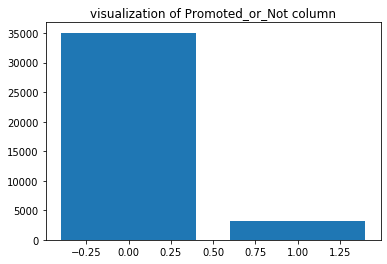

In [9]:
def value_count(data,key):
    data = data[key].value_counts()
    plt.bar(data.keys(), data.values.astype(int))
    plt.title('visualization of '+ key + ' column')
    plt.show()
    return
value_count(train_data, 'Promoted_or_Not')

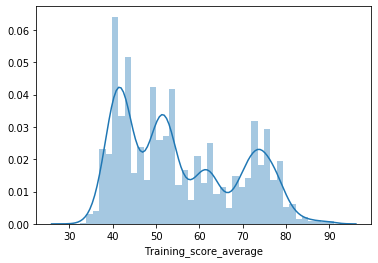

In [10]:
sns.distplot(train_data['Training_score_average'])
plt.show()

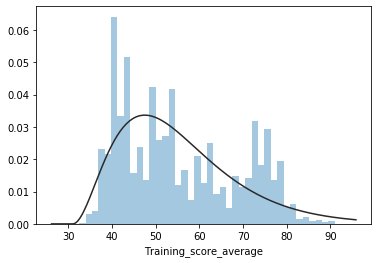

In [11]:
from scipy import stats
sns.distplot(train_data['Training_score_average'], kde=False, fit=stats.gamma)
plt.show()

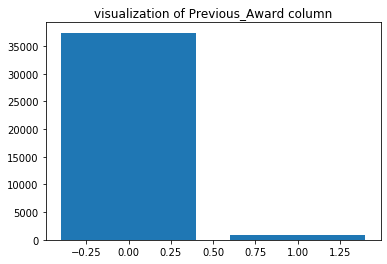

In [12]:
value_count(train_data, 'Previous_Award')

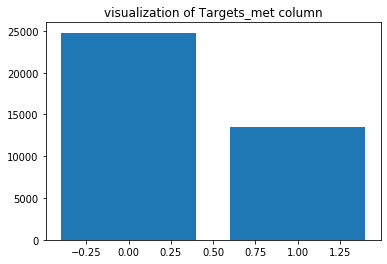

In [13]:
value_count(train_data, 'Targets_met')

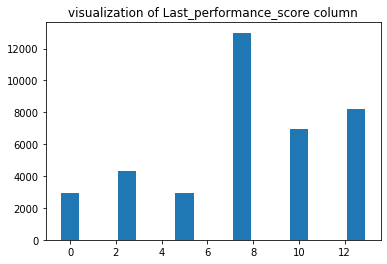

In [14]:
value_count(train_data, 'Last_performance_score')

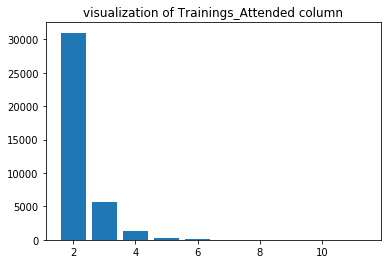

In [15]:
value_count(train_data, 'Trainings_Attended')

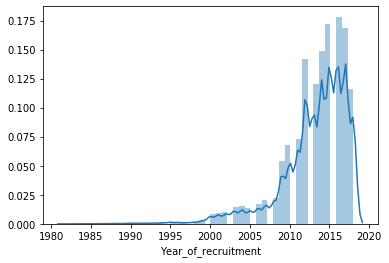

In [16]:
sns.distplot(train_data['Year_of_recruitment'])
plt.show()

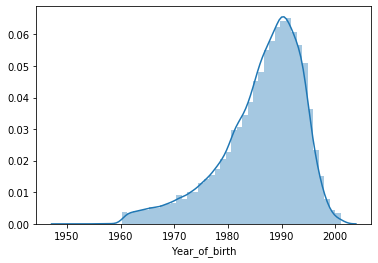

In [17]:
sns.distplot(train_data['Year_of_birth'])
plt.show()

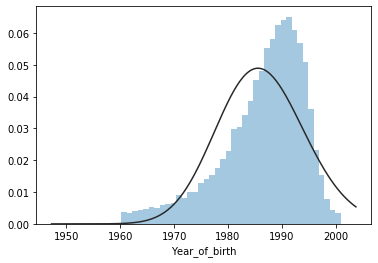

In [18]:
from scipy import stats
sns.distplot(train_data['Year_of_birth'], kde=False, fit=stats.gamma)
plt.show()

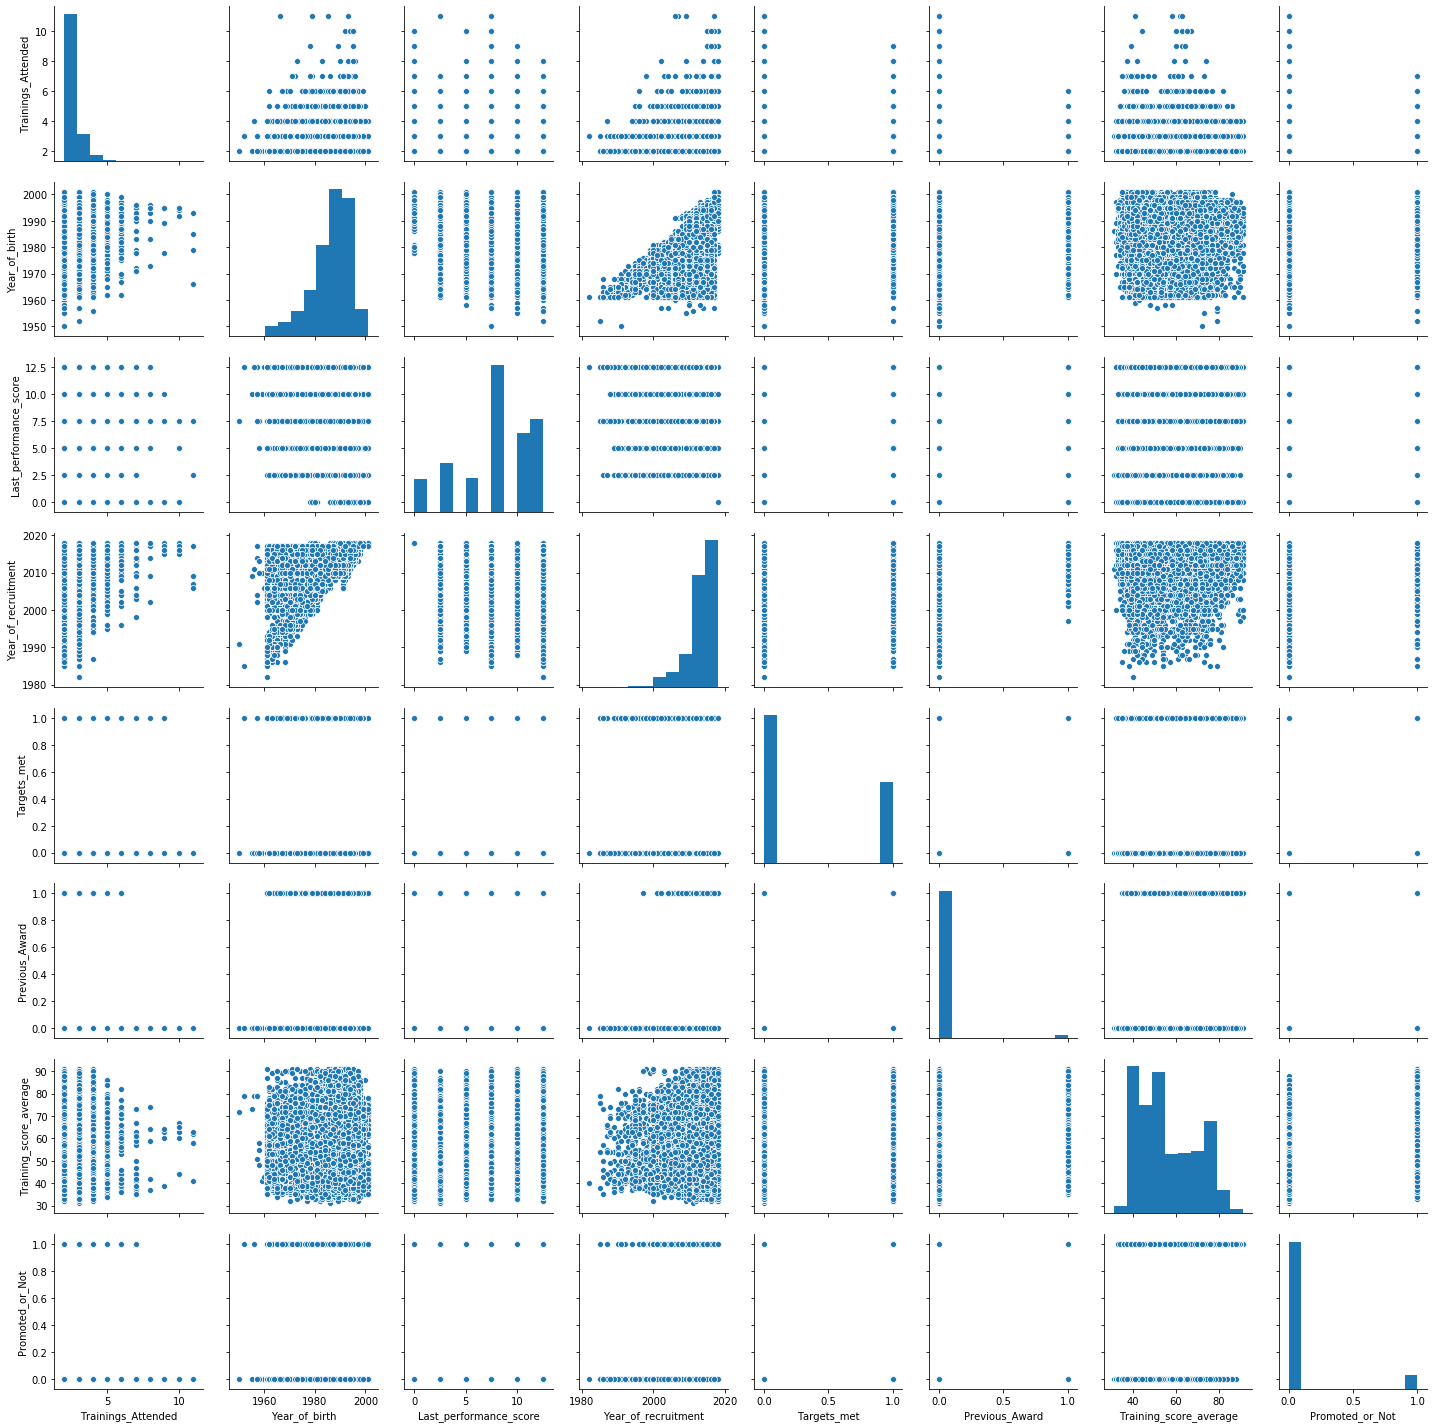

In [19]:
sns.pairplot(train_data)
plt.show()

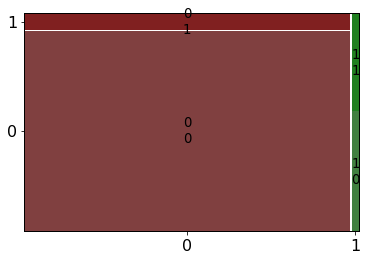

In [20]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(train_data, ['Previous_Award', 'Promoted_or_Not']);
plt.show()

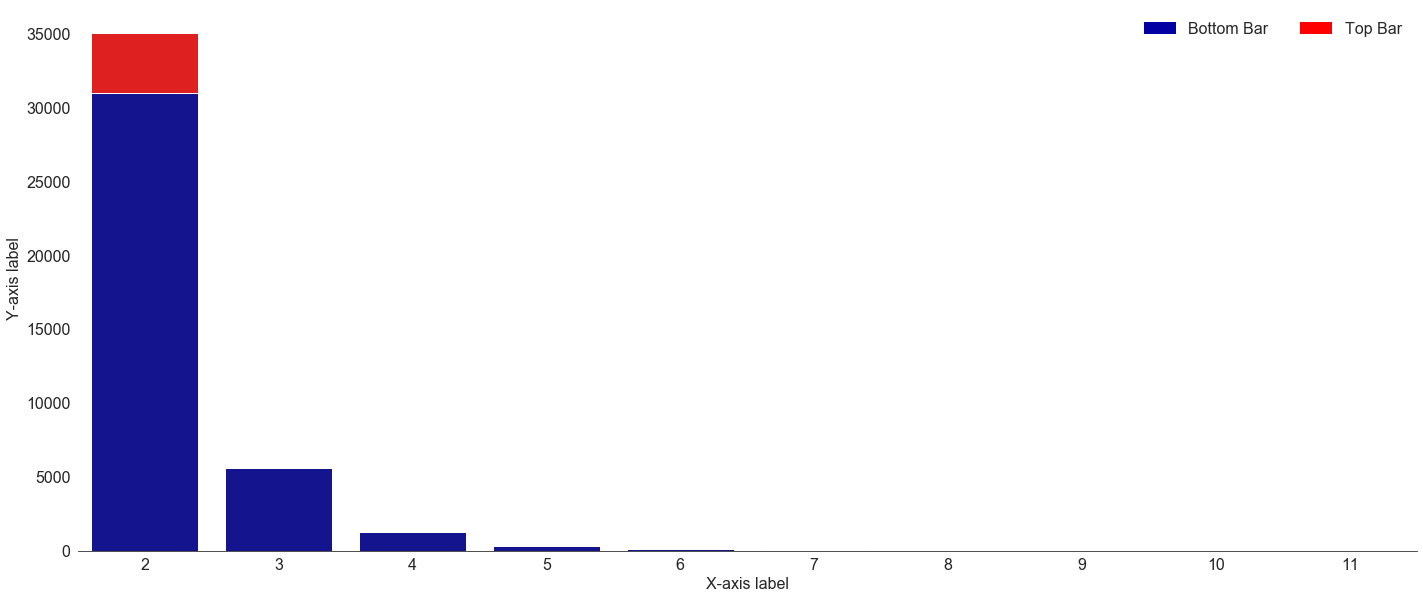

In [21]:
def stacked_plot(data,data1):  
    #Set general plot properties
    sns.set_style("white")
    sns.set_context({"figure.figsize": (24, 10)})

    #Plot 1 - background - "total" (top) series
    data = data.value_counts()
    sns.barplot(x = data.keys(), y = data.values, color = "red")

    #Plot 2 - overlay - "bottom" series
    data1 = data1.value_counts()
    bottom_plot = sns.barplot(x = data1.keys(), y = data1.values, color = "#0000A3")


    topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
    bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
    l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
    l.draw_frame(False)

    #Optional code - Make plot look nicer
    sns.despine(left=True)
    bottom_plot.set_ylabel("Y-axis label")
    bottom_plot.set_xlabel("X-axis label")

    #Set fonts to consistent 16pt size
    for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
                 bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
        item.set_fontsize(16)
    plt.show()
    return

stacked_plot(train_data['Promoted_or_Not'],train_data['Trainings_Attended'])

In [24]:
def report(data, target):
    val = data.value_counts()
    final_dict = {}
    output_data = []
    for k in val.keys():
        sample = [data == k]
        count_zero, count_one = 0,0
        for i, j in zip(sample[0], target):
            if i == True:
                if j == True:
                    count_one+= 1
                else:
                    count_zero+= 1
            else:
                pass
        
        final_dict[k] = (count_zero, count_one)
    # give prority to the 1's with target
    for key in final_dict.keys():
        final_dict[key][1]
    return final_dict

dictionary = report(train_data['Trainings_Attended'], train_data['Promoted_or_Not'])

dictionary

In [25]:
test_data = test_data.drop(['Trainings_Attended'], axis = 1)
train_data = train_data.drop(['Trainings_Attended'], axis = 1)

In [26]:
train_data['Promoted_or_Not'].sum()/train_data.shape[0]

0.08459490499060347

In [27]:
train_data.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Year_of_birth', 'Last_performance_score',
       'Year_of_recruitment', 'Targets_met', 'Previous_Award',
       'Training_score_average', 'State_Of_Origin', 'Foreign_schooled',
       'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not'],
      dtype='object')

# Year of birth

In [28]:
dictionary = report(train_data['Year_of_birth'], train_data['Promoted_or_Not'])
dictionary

{1991: (2309, 235),
 1990: (2295, 211),
 1989: (2237, 204),
 1992: (2178, 202),
 1988: (2053, 215),
 1993: (2000, 217),
 1987: (1959, 198),
 1994: (1806, 179),
 1986: (1691, 191),
 1985: (1617, 149),
 1984: (1374, 131),
 1995: (1299, 117),
 1983: (1216, 126),
 1982: (1078, 117),
 1981: (1084, 78),
 1996: (865, 45),
 1980: (823, 70),
 1979: (735, 62),
 1978: (627, 58),
 1977: (556, 44),
 1997: (543, 53),
 1976: (515, 36),
 1975: (473, 35),
 1973: (367, 30),
 1974: (374, 20),
 1971: (330, 23),
 1972: (288, 24),
 1998: (279, 26),
 1970: (237, 19),
 1969: (229, 20),
 1968: (223, 10),
 1966: (197, 10),
 1967: (180, 15),
 1965: (162, 16),
 1964: (164, 4),
 1999: (154, 13),
 1963: (149, 12),
 1961: (139, 8),
 1962: (124, 10),
 2001: (69, 2),
 2000: (62, 4),
 1957: (4, 0),
 1958: (3, 0),
 1960: (1, 0),
 1959: (1, 0),
 1956: (0, 1),
 1955: (1, 0),
 1950: (1, 0),
 1952: (0, 1)}

In [29]:
def appy_year(key):
    if key in [i for i in range(1980, 1996)]:
        count = 0
    else:
        count = 1
    return count

#train_data['Year_of_recruitment'] = train_data['Year_of_recruitment'].apply(appy_year)
#test_data['Year_of_recruitment'] = test_data['Year_of_recruitment'].apply(appy_year)

#train_data['Year_of_recruitment'] = train_data['Year_of_recruitment'].astype('int')
#test_data['Year_of_recruitment'] = test_data['Year_of_recruitment'].astype('int')

#train_data = train_data.drop(['Year_of_recruitment'], axis = 1)
#test_data = test_data.drop(['Year_of_recruitment'], axis = 1)

train_data['Year_of_birth'] = train_data['Year_of_birth'].apply(appy_year)
test_data['Year_of_birth'] = test_data['Year_of_birth'].apply(appy_year)


In [30]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)


# year of recruitment

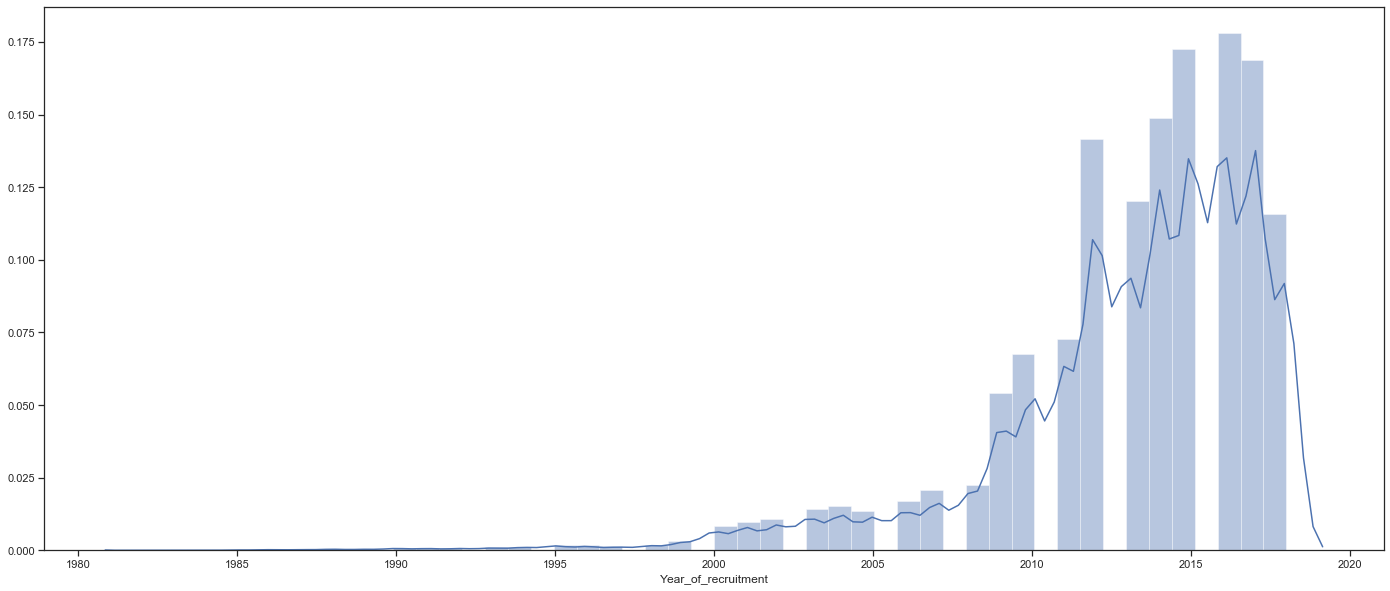

In [31]:
sns.distplot(train_data['Year_of_recruitment'])
plt.show()

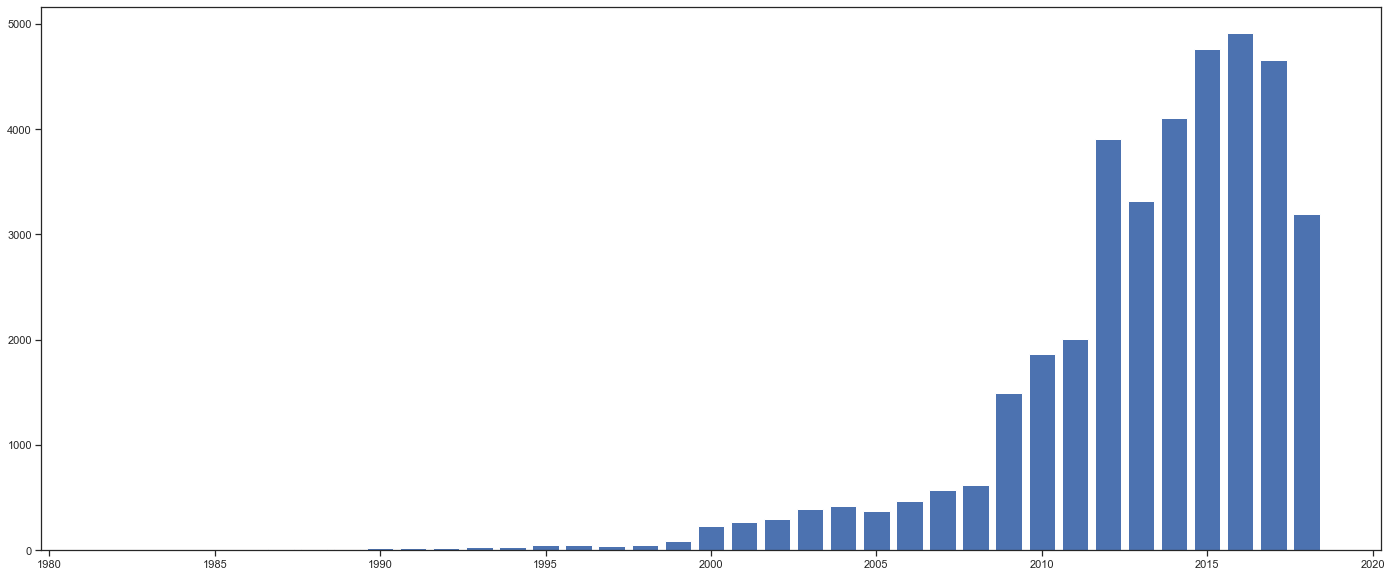

In [32]:
data = train_data['Year_of_recruitment'].value_counts()
plt.bar(data.keys(), data.values)
plt.show()

In [33]:
dictionary = report(train_data['Year_of_recruitment'], train_data['Promoted_or_Not'])
dictionary

{2016: (4465, 451),
 2015: (4361, 396),
 2017: (4230, 426),
 2014: (3790, 311),
 2012: (3594, 315),
 2013: (3036, 278),
 2018: (2922, 272),
 2011: (1825, 186),
 2010: (1708, 157),
 2009: (1366, 131),
 2008: (558, 61),
 2007: (523, 47),
 2006: (431, 41),
 2004: (389, 33),
 2003: (364, 30),
 2005: (357, 19),
 2002: (272, 21),
 2001: (250, 19),
 2000: (210, 20),
 1999: (84, 6),
 1998: (51, 2),
 1995: (51, 0),
 1996: (41, 5),
 1997: (33, 5),
 1994: (33, 2),
 1993: (27, 0),
 1990: (21, 1),
 1991: (19, 2),
 1992: (19, 1),
 1988: (13, 0),
 1989: (11, 0),
 1987: (6, 2),
 1986: (7, 0),
 1985: (3, 1),
 1982: (1, 0)}

In [34]:
def per(data,arr,target):
    #get percent data
    sol = 0
    for key in data.keys():
        sol+= data[key][1]
    
    # sort data
    sorted(data)

    # get keys needed to be encoded
    get_keys = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
    
    # encode get_keys
    output_array = []
    for k,i in zip(arr,target):
        if k in get_keys and i == 1:
            output_array.append(1)
        else:
            output_array.append(0)
    return output_array

#tr = per(dictionary, train_data['Year_of_recruitment'], train_data['Promoted_or_Not'])

def appy_year(key):
    if key in [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]:
        count = 1
    else:
        count = 0
    return count

#train_data['Year_of_recruitment'] = train_data['Year_of_recruitment'].apply(appy_year)
#test_data['Year_of_recruitment'] = test_data['Year_of_recruitment'].apply(appy_year)

#train_data['Year_of_recruitment'] = train_data['Year_of_recruitment'].astype('int')
#test_data['Year_of_recruitment'] = test_data['Year_of_recruitment'].astype('int')

#train_data = train_data.drop(['Year_of_recruitment'], axis = 1)
#test_data = test_data.drop(['Year_of_recruitment'], axis = 1)

train_data = train_data.drop(['Year_of_recruitment'], axis = 1)
test_data = test_data.drop(['Year_of_recruitment'], axis = 1)


# Qualification

In [35]:
report(train_data['Qualification'], train_data['Promoted_or_Not'])

{'First Degree or HND': (23483, 2095),
 'MSc, MBA and PhD': (9457, 1012),
 'Non-University Education': (534, 52)}

In [36]:
dict_qualification = train_data['Qualification'].value_counts()
dict_qualification

First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

In [37]:
train_data['Qualification'].isnull().sum()

1679

In [38]:
dict_qualification.keys()

Index(['First Degree or HND', 'MSc, MBA and PhD', 'Non-University Education'], dtype='object')

In [41]:
train_data['Qualification'] =train_data['Qualification'].fillna('First Degree or HND', inplace = True)

In [42]:
test_data['Qualification'].fillna('First Degree or HND', inplace = True)

In [43]:
train_data = pd.get_dummies(train_data, columns = ['Qualification'])
test_data = pd.get_dummies(test_data, columns = ['Qualification'])

# Channel of Recruitment

In [44]:
data = train_data['Channel_of_Recruitment'].value_counts()
data

Agency and others                  21310
Direct Internal process            16194
Referral and Special candidates      808
Name: Channel_of_Recruitment, dtype: int64

In [45]:
dictionary = report(train_data['Channel_of_Recruitment'], train_data['Promoted_or_Not'])
dictionary

{'Agency and others': (19514, 1796),
 'Direct Internal process': (14847, 1347),
 'Referral and Special candidates': (710, 98)}

In [46]:
train_data = pd.get_dummies(train_data,columns = ['Channel_of_Recruitment'])
test_data = pd.get_dummies(test_data,columns = ['Channel_of_Recruitment'])

# State of Origin

In [47]:
dict_state = train_data['State_Of_Origin'].value_counts()
dict_state.keys()

Index(['LAGOS', 'FCT', 'OGUN', 'RIVERS', 'ANAMBRA', 'KANO', 'DELTA', 'OYO',
       'KADUNA', 'IMO', 'EDO', 'ENUGU', 'ABIA', 'OSUN', 'ONDO', 'NIGER',
       'KWARA', 'PLATEAU', 'AKWA IBOM', 'NASSARAWA', 'KATSINA', 'ADAMAWA',
       'BENUE', 'BAUCHI', 'KOGI', 'SOKOTO', 'CROSS RIVER', 'EKITI', 'BORNO',
       'TARABA', 'KEBBI', 'BAYELSA', 'EBONYI', 'GOMBE', 'ZAMFARA', 'JIGAWA',
       'YOBE'],
      dtype='object')

In [48]:
dictionary = report(train_data['State_Of_Origin'], train_data['Promoted_or_Not'])
dictionary

{'LAGOS': (5670, 534),
 'FCT': (2202, 187),
 'OGUN': (2130, 172),
 'RIVERS': (2031, 191),
 'ANAMBRA': (1546, 164),
 'KANO': (1504, 145),
 'DELTA': (1456, 138),
 'OYO': (1377, 131),
 'KADUNA': (1284, 115),
 'IMO': (1191, 116),
 'EDO': (1158, 101),
 'ENUGU': (934, 91),
 'ABIA': (885, 65),
 'OSUN': (841, 88),
 'ONDO': (772, 103),
 'NIGER': (796, 61),
 'KWARA': (713, 52),
 'PLATEAU': (674, 65),
 'AKWA IBOM': (616, 57),
 'NASSARAWA': (576, 56),
 'KATSINA': (567, 48),
 'ADAMAWA': (558, 47),
 'BENUE': (534, 45),
 'BAUCHI': (512, 45),
 'KOGI': (501, 41),
 'SOKOTO': (451, 48),
 'CROSS RIVER': (454, 41),
 'EKITI': (416, 39),
 'BORNO': (407, 40),
 'TARABA': (360, 40),
 'KEBBI': (357, 36),
 'BAYELSA': (299, 25),
 'EBONYI': (291, 22),
 'GOMBE': (261, 30),
 'ZAMFARA': (267, 23),
 'JIGAWA': (244, 18),
 'YOBE': (236, 21)}

In [49]:
def appy(data):
    if data in ['LAGOS','RIVERS','KANO','ANAMBRA','DELTA','FCT','OGUN','OYO']:
        count = 1
    else:
        count = 0
    return count
train_data = train_data.drop('State_Of_Origin', axis = 1)
test_data = test_data.drop('State_Of_Origin', axis = 1)



# Foreign Schooled

In [50]:
train_data['Foreign_schooled'].value_counts()

Yes    34995
No      3317
Name: Foreign_schooled, dtype: int64

In [51]:
dictionary = report(train_data['Foreign_schooled'], train_data['Promoted_or_Not'])
dictionary

{'Yes': (32025, 2970), 'No': (3046, 271)}

In [52]:
train_data = pd.get_dummies(train_data, columns =['Foreign_schooled'])
test_data = pd.get_dummies(test_data, columns =['Foreign_schooled'])

# Marital Status

In [574]:
dictionary = report(train_data['Marital_Status'], train_data['Promoted_or_Not'])
dictionary

{'Married': (28386, 2636), 'Not_Sure': (324, 39), 'Single': (6361, 566)}

In [575]:
def appy(data):
    if data == 'Married':
        count = 0
    else:
        count = 1
    return count
train_data['Marital_Status'] = train_data['Marital_Status'].apply(appy)
test_data['Marital_Status'] = test_data['Marital_Status'].apply(appy)

# Past_Disciplinary_Action

In [576]:
train_data['Past_Disciplinary_Action'].value_counts()

No     38161
Yes      151
Name: Past_Disciplinary_Action, dtype: int64

In [577]:
dictionary = report(train_data['Past_Disciplinary_Action'], train_data['Promoted_or_Not'])
dictionary

{'No': (34936, 3225), 'Yes': (135, 16)}

In [578]:
train_data['Past_Disciplinary_Action'][train_data['Past_Disciplinary_Action'] == 'Yes'] = 1
train_data['Past_Disciplinary_Action'][train_data['Past_Disciplinary_Action'] == 'No'] = 0

In [579]:
test_data['Past_Disciplinary_Action'][test_data['Past_Disciplinary_Action'] == 'Yes'] = 1
test_data['Past_Disciplinary_Action'][test_data['Past_Disciplinary_Action'] == 'No'] = 0

# Previous_IntraDepartmental_Movement

In [580]:
train_data['Previous_IntraDepartmental_Movement'].value_counts()

No     34709
Yes     3603
Name: Previous_IntraDepartmental_Movement, dtype: int64

In [581]:
dictionary = report(train_data['Previous_IntraDepartmental_Movement'], train_data['Promoted_or_Not'])
dictionary

{'No': (31747, 2962), 'Yes': (3324, 279)}

In [582]:
train_data = pd.get_dummies(train_data, columns = ['Previous_IntraDepartmental_Movement'])
test_data = pd.get_dummies(test_data, columns = ['Previous_IntraDepartmental_Movement'])

# number of previous employers

In [583]:
val = train_data['No_of_previous_employers'].value_counts()
val

1              18867
0              13272
2               1918
3               1587
4               1324
5                943
More than 5      401
Name: No_of_previous_employers, dtype: int64

In [584]:
dictionary = report(train_data['No_of_previous_employers'], train_data['Promoted_or_Not'])
dictionary

{'0': (12179, 1093),
 '1': (17253, 1614),
 '2': (1742, 176),
 '3': (1452, 135),
 '4': (1203, 121),
 '5': (872, 71),
 'More than 5': (370, 31)}

In [585]:
train_data = pd.get_dummies(train_data, columns = ['No_of_previous_employers'])
test_data = pd.get_dummies(test_data, columns = ['No_of_previous_employers'])

# Division

In [586]:
dictionary = report(train_data['Division'], train_data['Promoted_or_Not'])
dictionary

{'Business Finance Operations': (1640, 146),
 'Commercial Sales and Marketing': (10854, 841),
 'Customer Support and Field Operations': (7269, 704),
 'Information Technology and Solution Support': (4420, 532),
 'Information and Strategy': (3373, 348),
 'People/HR Management': (1607, 97),
 'Regulatory and Legal services': (692, 41),
 'Research and Innovation': (653, 43),
 'Sourcing and Purchasing': (4563, 489)}

In [587]:
train_data = pd.get_dummies(train_data, columns = ['Division'])
test_data = pd.get_dummies(test_data, columns = ['Division'])

In [588]:
target_id = test_data['EmployeeNo']
test_data = test_data.drop('EmployeeNo', axis = 1)

In [589]:
'Promoted_or_Not' in test_data.columns

False

In [590]:
train_data.shape, test_data.shape

((38312, 36), (16496, 34))

In [591]:
train_data = train_data.drop('EmployeeNo', axis = 1)
train_data.shape

(38312, 35)

In [592]:
for k in train_data.columns:
    if k in test_data.columns:
        pass
    else:
        print(k)

Promoted_or_Not


In [593]:
train_data.head()

,Gender,Year_of_birth,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Marital_Status,Past_Disciplinary_Action,Promoted_or_Not,Qualification_First Degree or HND,...,No_of_previous_employers_More than 5,Division_Business Finance Operations,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing
0,Female,0,12.5,1,0,41,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,Male,0,12.5,0,0,52,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,Male,0,7.5,0,0,42,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,Male,0,2.5,0,0,42,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,Male,0,7.5,0,0,77,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


# Last performance score

In [594]:
dictionary = report(train_data['Last_performance_score'], train_data['Promoted_or_Not'])
dictionary

{0.0: (2659, 246),
 2.5: (4266, 59),
 5.0: (2806, 138),
 7.5: (12059, 934),
 10.0: (6367, 565),
 12.5: (6914, 1299)}

In [595]:
def appl(k):
    if k in [12.5, 10.0,7.5]:
        count = 0
    else:
        count = 1
    return count
train_data = pd.get_dummies(train_data, columns = ['Last_performance_score'])
test_data = pd.get_dummies(test_data, columns = ['Last_performance_score'])

# trainings score average

In [596]:
def ap(val):
    if val >= 30 and val<= 80:
        count = 0
    else:
        count = 1
    return count
train_data['Training_score_average'] = train_data['Training_score_average'].apply(appl)
test_data['Training_score_average'] = test_data['Training_score_average'].apply(appl)
test_data['Training_score_average'] = test_data['Training_score_average'].astype('int')
train_data['Training_score_average'] = train_data['Training_score_average'].astype('int')


In [597]:
train_data.shape, test_data.shape

((38312, 40), (16496, 39))

In [598]:
train_data.head()

,Gender,Year_of_birth,Targets_met,Previous_Award,Training_score_average,Marital_Status,Past_Disciplinary_Action,Promoted_or_Not,Qualification_First Degree or HND,"Qualification_MSc, MBA and PhD",...,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,Last_performance_score_0.0,Last_performance_score_2.5,Last_performance_score_5.0,Last_performance_score_7.5,Last_performance_score_10.0,Last_performance_score_12.5
0,Female,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,Male,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,Male,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,Male,0,0,0,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,Male,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [599]:
test_data.head()

,Gender,Year_of_birth,Targets_met,Previous_Award,Training_score_average,Marital_Status,Past_Disciplinary_Action,Qualification_First Degree or HND,"Qualification_MSc, MBA and PhD",Qualification_Non-University Education,...,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,Last_performance_score_0.0,Last_performance_score_2.5,Last_performance_score_5.0,Last_performance_score_7.5,Last_performance_score_10.0,Last_performance_score_12.5
0,Male,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,Male,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Male,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
3,Male,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Male,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Model building

In [600]:
y_copy = train_data['Promoted_or_Not']
x_copy = train_data.drop('Promoted_or_Not', axis = 1)
x = x_copy.copy()
y = y_copy.copy()

# Feature engineering

In [601]:
train_data['Past_Disciplinary_Action'] = train_data['Past_Disciplinary_Action'].astype('int')


test_data['Past_Disciplinary_Action'] = test_data['Past_Disciplinary_Action'].astype('int')


In [602]:
dictionary = report(train_data['Gender'], train_data['Promoted_or_Not'])
dictionary

{'Female': (10414, 1018), 'Male': (24657, 2223)}

In [603]:
train_data = pd.get_dummies(train_data, columns = ['Gender'])
test_data = pd.get_dummies(test_data, columns = ['Gender'])

#train_data = train_data.drop('Gender', axis = 1)
#test_data = test_data.drop('Gender', axis = 1)

In [604]:
train_data.shape, test_data.shape

((38312, 41), (16496, 40))

In [605]:
y_copy = train_data['Promoted_or_Not']
x_copy = train_data.drop('Promoted_or_Not', axis = 1)
x = x_copy.copy()
y = y_copy.copy()

In [606]:
special_x = x.copy()
special_y = y.copy()

# PCA

# Scaling

In [607]:
x.shape

(38312, 40)

In [608]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
min_max = MinMaxScaler()


x = min_max.fit_transform(x)

In [609]:
from sklearn.model_selection import train_test_split
y = y.astype('int')
x_train, x_test,y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 42, stratify = y)


In [610]:
sum(y_train), sum(y_test)

(2269, 972)

In [611]:
sum(y_train)/y_train.shape[0]

0.084607353270191657

In [612]:
sum(y_test)/y_test.shape[0]

0.084565860448929872

# Decison Tree

In [615]:
#x_train = X_train
from sklearn.tree import DecisionTreeClassifier
lr = DecisionTreeClassifier(max_depth = 60, min_samples_split = 8, min_samples_leaf = 2)
from sklearn.metrics import accuracy_score, precision_score, f1_score
lr.fit(x_train, y_train)
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.92706391229771046, 0.90934400556812245)

In [614]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
lr = DecisionTreeClassifier()

max_depth = [10,20,30,40,50,60,70,80,90]
min_samples_split = [8,10,12,14,16,18,20]
min_samples_leaf = [2,4,6,8]


param_grid = dict(max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(estimator=lr,
                    param_grid=param_grid,
                    scoring='recall',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 252 candidates, totalling 756 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 756 out of 756 | elapsed:   36.0s finished


Best Score:  0.10445293678
Best Params:  {'max_depth': 60, 'min_samples_leaf': 2, 'min_samples_split': 8}


In [616]:
from sklearn import metrics
lr.fit(x_train, y_train)

pred = lr.predict(x_test)

print('confusion matrix')
print(metrics.confusion_matrix(y_test, pred))

confusion matrix
[[10351   171]
 [  876    96]]


In [617]:
print('classification report')
print(metrics.classification_report(y_test, pred))


classification report
             precision    recall  f1-score   support

          0       0.92      0.98      0.95     10522
          1       0.36      0.10      0.15       972

avg / total       0.87      0.91      0.88     11494



In [325]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(max_depth = 100, min_samples_split = 2, min_samples_leaf = 4, n_estimators = 1400)
rand.fit(x_train, y_train)
pred = rand.predict(x_test)

In [326]:
print('classification report')
from sklearn import metrics
print(metrics.classification_report(y_test, pred))


classification report
             precision    recall  f1-score   support

          0       0.93      1.00      0.96     10522
          1       0.97      0.20      0.33       972

avg / total       0.93      0.93      0.91     11494



In [219]:
y_test_pred = pred
f1_score(y_test,y_test_preds,average= 'weighted'),f1_score(y_test,y_test_preds,average= 'macro'),f1_score(y_test,y_test_preds,average= 'micro')

(0.92952322136197374, 0.73510751028041088, 0.9417982513375962)

In [324]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier()

max_depth = [100,120]
min_samples_split = [2]
n_estimators = [1200,1400]
min_samples_leaf = [4,5,6]


param_grid = dict(max_depth = max_depth, min_samples_split = min_samples_split,
                 n_estimators = n_estimators,min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(estimator=lr,
                    param_grid=param_grid,
                    scoring='recall',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  3.9min finished


Best Score:  0.171433049121
Best Params:  {'max_depth': 100, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 1400}


In [95]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'median_absolute_error', 'mean_absolute_error', 'mean_squared_error', 'accuracy', 'roc_auc', 'average_precision', 'log_loss', 'neg_log_loss', 'adjusted_rand_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

# XGBoost model

In [220]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
prediction = xgb.predict(x_test)
prediction = prediction.astype('int')
from sklearn.metrics import classification_report
classification_report(y_test, prediction)        

'             precision    recall  f1-score   support\n\n          0       0.93      1.00      0.96      7015\n          1       0.97      0.21      0.35       648\n\navg / total       0.94      0.93      0.91      7663\n'

In [221]:
f1_score(y_test, prediction)

0.35101010101010099

In [327]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier()
learning_rate = [0.01,0.1,1,10,100]

n_estimators = [500,600,700,800]

max_depth = [6,8,10]


param_grid = dict(learning_rate = learning_rate,
                 n_estimators = n_estimators, max_depth = max_depth)

grid = GridSearchCV(estimator=xgb,
                    param_grid=param_grid,
                    scoring='recall',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  7.5min


KeyboardInterrupt: 

In [222]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt= GradientBoostingClassifier(n_estimators = 600, max_depth = 8, learning_rate = 0.01)
gbrt.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=600, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [223]:
y_test_preds= gbrt.predict(x_test).astype('int')
from sklearn.metrics import classification_report, f1_score
classification_report(y_test, y_test_preds)

'             precision    recall  f1-score   support\n\n          0       0.93      1.00      0.96      7015\n          1       0.95      0.21      0.35       648\n\navg / total       0.93      0.93      0.91      7663\n'

In [224]:

f1_score(y_test,y_test_preds,average= 'weighted'),f1_score(y_test,y_test_preds,average= 'macro'),f1_score(y_test,y_test_preds,average= 'micro')

(0.91254000797658064, 0.65730904991399164, 0.93266344773587373)

# optimize

In [225]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(n_estimators = 500, max_depth = 10, learning_rate = 0.01)



bst = xgb.fit(x_train, y_train)
y_test_preds= bst.predict(x_test).astype('int')

classification_report(y_test, y_test_preds)

'             precision    recall  f1-score   support\n\n          0       0.93      1.00      0.96      7015\n          1       0.95      0.21      0.35       648\n\navg / total       0.93      0.93      0.91      7663\n'

In [111]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier()
learning_rate = [0.01,0.1]

n_estimators = [1200, 1300,1400]

max_depth = [4,6,8,10]

param_grid ={'learning_rate': learning_rate,
                 'n_estimators': n_estimators, 'max_depth': max_depth}

grid = GridSearchCV(estimator=xgb,
                    param_grid=param_grid,
                    scoring='f1_weighted',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 12.8min finished


Best Score:  0.928431253905
Best Params:  {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1300}


In [226]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(n_estimators = 1300, max_depth = 6, learning_rate = 0.01)

from sklearn.metrics import classification_report, f1_score


bst = xgb.fit(x_train, y_train)
y_test_preds= bst.predict(x_test).astype('int')

classification_report(y_test, y_test_preds)

'             precision    recall  f1-score   support\n\n          0       0.93      1.00      0.96      7015\n          1       0.95      0.21      0.35       648\n\navg / total       0.93      0.93      0.91      7663\n'

In [227]:

f1_score(y_test,y_test_preds,average= 'weighted'),f1_score(y_test,y_test_preds,average= 'macro'),f1_score(y_test,y_test_preds,average= 'micro')

(0.91254000797658064, 0.65730904991399164, 0.93266344773587373)

In [99]:
prediction = xgb.predict(test_X)

# adaboost

In [618]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
pred = ada.predict(x_test)
from sklearn.metrics import classification_report, f1_score, precision_score
classification_report(y_test, pred)

'             precision    recall  f1-score   support\n\n          0       0.92      0.99      0.96     10522\n          1       0.47      0.06      0.11       972\n\navg / total       0.88      0.91      0.88     11494\n'

In [619]:
ada.feature_importances_

array([ 0.06,  0.06,  0.04,  0.  ,  0.04,  0.02,  0.  ,  0.06,  0.02,
        0.02,  0.02,  0.02,  0.02,  0.  ,  0.02,  0.  ,  0.04,  0.  ,
        0.02,  0.02,  0.04,  0.02,  0.02,  0.04,  0.  ,  0.02,  0.04,
        0.04,  0.04,  0.02,  0.04,  0.02,  0.04,  0.04,  0.04,  0.  ,
        0.02,  0.02,  0.  ,  0.02])

In [620]:
train_data.shape

(38312, 41)

In [621]:
col = []
for k, j in zip(ada.feature_importances_, train_data.columns):
    if k<=0:
        pass
    else:
        print(k)
        col.append(j)

0.06
0.06
0.04
0.04
0.02
0.06
0.02
0.02
0.02
0.02
0.02
0.02
0.04
0.02
0.02
0.04
0.02
0.02
0.04
0.02
0.04
0.04
0.04
0.02
0.04
0.02
0.04
0.04
0.04
0.02
0.02
0.02


In [622]:
x = train_data[col]
test_data = test_data[col]

In [623]:
from sklearn.model_selection import train_test_split
y = y.astype('int')
x_train, x_test,y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 42, stratify = y)
sum(y_train)/y_train.shape[0], sum(y_test)/y_test.shape[0]

(0.084603086560736077, 0.084562181913088869)

In [624]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=1200,learning_rate=1)
ada.fit(x_train, y_train)
pred = ada.predict(x_test)
from sklearn.metrics import classification_report, f1_score, precision_score
classification_report(y_test, pred)

'             precision    recall  f1-score   support\n\n          0       0.92      0.99      0.96      7015\n          1       0.51      0.07      0.13       648\n\navg / total       0.89      0.92      0.89      7663\n'